In [1]:
#시작전 설정
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

#한글 설정
#plt.rc('font',family='AppleGothic') # 맥 한글 설정
plt.rc('font',family='Malgun Gothic')
plt.rc('axes',unicode_minus=False)
#경고 메시지 안보이게
import warnings
warnings.filterwarnings(action='ignore')
import numpy as np
import pandas as pd
import xlrd
import seaborn as sns

# 1.2000~2020년도 서울시 출산율 사망률 데이터 불러오기

In [2]:
# 데이터 불러오기(이연주)
ingu=pd.read_excel("report.xls",header=None)
ingu

,0,1,2,3,4,5,6,7,8
0,기간,자치구별,월별,출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별),출생사망(월별)
1,기간,자치구별,월별,출생,출생,출생,사망,사망,사망
2,기간,자치구별,월별,계,남자,여자,계,남자,여자
3,2000,합계,계,133154,69406,63748,39296,21387,17909
4,2000,합계,1월,12866,6738,6128,3931,2048,1883
...,...,...,...,...,...,...,...,...,...
7096,2020,강동구,8월,232,123,109,159,95,64
7097,2020,강동구,9월,241,111,130,167,87,80
7098,2020,강동구,10월,207,108,99,182,101,81
7099,2020,강동구,11월,201,97,104,167,94,73


# 2.데이터 전처리

In [3]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7101 entries, 0 to 7100
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       7101 non-null   object
 1   1       7101 non-null   object
 2   2       7101 non-null   object
 3   3       7101 non-null   object
 4   4       7101 non-null   object
 5   5       7101 non-null   object
 6   6       7101 non-null   object
 7   7       7101 non-null   object
 8   8       7101 non-null   object
dtypes: object(9)
memory usage: 499.4+ KB


## 2.1필요없는 행 제거

In [4]:
#필요없는 행 제거
ingu=ingu[(ingu[1]!="자치구별")&(ingu[1]!="합계")]
ingu=ingu[(ingu[2]!="계")]
ingu

,0,1,2,3,4,5,6,7,8
17,2000,종로구,1월,141,76,65,97,42,55
18,2000,종로구,2월,175,98,77,74,35,39
19,2000,종로구,3월,211,114,97,71,39,32
20,2000,종로구,4월,176,92,84,80,39,41
21,2000,종로구,5월,143,77,66,66,36,30
...,...,...,...,...,...,...,...,...,...
7096,2020,강동구,8월,232,123,109,159,95,64
7097,2020,강동구,9월,241,111,130,167,87,80
7098,2020,강동구,10월,207,108,99,182,101,81
7099,2020,강동구,11월,201,97,104,167,94,73


## 2.2 필요없는 열 제거

In [5]:
ingu.drop(labels=[3,6],axis=1,inplace=True)

In [6]:
ingu

,0,1,2,4,5,7,8
17,2000,종로구,1월,76,65,42,55
18,2000,종로구,2월,98,77,35,39
19,2000,종로구,3월,114,97,39,32
20,2000,종로구,4월,92,84,39,41
21,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
7096,2020,강동구,8월,123,109,95,64
7097,2020,강동구,9월,111,130,87,80
7098,2020,강동구,10월,108,99,101,81
7099,2020,강동구,11월,97,104,94,73


## 2.3 컬럼 이름 설정 및 인덱스 정리

In [7]:
ingu.columns=["년도","지역구","월","남자 출생수","여자 출생수","남자 사망수","여자 사망수"]
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
17,2000,종로구,1월,76,65,42,55
18,2000,종로구,2월,98,77,35,39
19,2000,종로구,3월,114,97,39,32
20,2000,종로구,4월,92,84,39,41
21,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
7096,2020,강동구,8월,123,109,95,64
7097,2020,강동구,9월,111,130,87,80
7098,2020,강동구,10월,108,99,101,81
7099,2020,강동구,11월,97,104,94,73


In [8]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 17 to 7100
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6300 non-null   object
 1   지역구     6300 non-null   object
 2   월       6300 non-null   object
 3   남자 출생수  6300 non-null   object
 4   여자 출생수  6300 non-null   object
 5   남자 사망수  6300 non-null   object
 6   여자 사망수  6300 non-null   object
dtypes: object(7)
memory usage: 393.8+ KB


In [9]:
#인덱스 재정리 
ingu.shape
ingu.shape[0]
ingu.index=range(ingu.shape[0])
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1월,76,65,42,55
1,2000,종로구,2월,98,77,35,39
2,2000,종로구,3월,114,97,39,32
3,2000,종로구,4월,92,84,39,41
4,2000,종로구,5월,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8월,123,109,95,64
6296,2020,강동구,9월,111,130,87,80
6297,2020,강동구,10월,108,99,101,81
6298,2020,강동구,11월,97,104,94,73


## 2.4 데이터 형변환 및 함수 활용 변수 변경

In [10]:
def function(data):
    data["월"]=data["월"].replace("월","")
    return data

In [11]:
ingu=ingu.apply(function,axis=1)
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8,123,109,95,64
6296,2020,강동구,9,111,130,87,80
6297,2020,강동구,10,108,99,101,81
6298,2020,강동구,11,97,104,94,73


In [12]:
ingu.isna().sum()

년도        0
지역구       0
월         0
남자 출생수    0
여자 출생수    0
남자 사망수    0
여자 사망수    0
dtype: int64

In [15]:
#데이터형 변환
ingu["년도"]=ingu["년도"].astype("int")
ingu["월"]=ingu["월"].astype("int")
ingu["남자 출생수"]=ingu["남자 출생수"].astype("int")
ingu["여자 출생수"]=ingu["여자 출생수"].astype("int")
ingu["남자 사망수"]=ingu["남자 사망수"].astype("int")
ingu["여자 사망수"]=ingu["여자 사망수"].astype("int")

In [16]:
ingu.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6300 entries, 0 to 6299
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   년도      6300 non-null   int32 
 1   지역구     6300 non-null   object
 2   월       6300 non-null   int32 
 3   남자 출생수  6300 non-null   int32 
 4   여자 출생수  6300 non-null   int32 
 5   남자 사망수  6300 non-null   int32 
 6   여자 사망수  6300 non-null   int32 
dtypes: int32(6), object(1)
memory usage: 197.0+ KB


In [17]:
ingu

,년도,지역구,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,종로구,1,76,65,42,55
1,2000,종로구,2,98,77,35,39
2,2000,종로구,3,114,97,39,32
3,2000,종로구,4,92,84,39,41
4,2000,종로구,5,77,66,36,30
...,...,...,...,...,...,...,...
6295,2020,강동구,8,123,109,95,64
6296,2020,강동구,9,111,130,87,80
6297,2020,강동구,10,108,99,101,81
6298,2020,강동구,11,97,104,94,73


## 2.5 groupby 활용 데이터 전처리

In [18]:
ingu_y=ingu.groupby(["년도"]).sum()
ingu_y

,월,남자 출생수,여자 출생수,남자 사망수,여자 사망수
년도,,,,,
2000,1950,69406,63748,21387,17909
2001,1950,59476,55288,21121,17334
2002,1950,53105,48903,21254,17671
2003,1950,52191,49036,20913,17155
2004,1950,51453,48375,21226,17048
2005,1950,46679,43789,21461,17290
2006,1950,48520,45402,21311,17208
2007,1950,52139,49110,21748,17268
2008,1950,48826,45910,21455,16843


In [19]:
ingu_b=ingu_y.drop("월",axis=1)
ingu_b

,남자 출생수,여자 출생수,남자 사망수,여자 사망수
년도,,,,
2000,69406,63748,21387,17909
2001,59476,55288,21121,17334
2002,53105,48903,21254,17671
2003,52191,49036,20913,17155
2004,51453,48375,21226,17048
2005,46679,43789,21461,17290
2006,48520,45402,21311,17208
2007,52139,49110,21748,17268
2008,48826,45910,21455,16843


## 2.6 rest_index() 활용

In [20]:
ingu_b=ingu_b.reset_index()
ingu_b

,년도,남자 출생수,여자 출생수,남자 사망수,여자 사망수
0,2000,69406,63748,21387,17909
1,2001,59476,55288,21121,17334
2,2002,53105,48903,21254,17671
3,2003,52191,49036,20913,17155
4,2004,51453,48375,21226,17048
5,2005,46679,43789,21461,17290
6,2006,48520,45402,21311,17208
7,2007,52139,49110,21748,17268
8,2008,48826,45910,21455,16843
9,2009,45963,43631,21955,16835


# 3.데이터 시각화

## 3-1.파이플롯

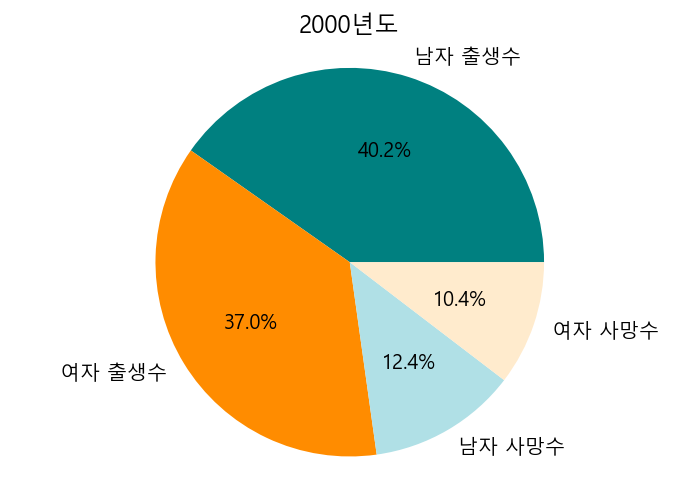

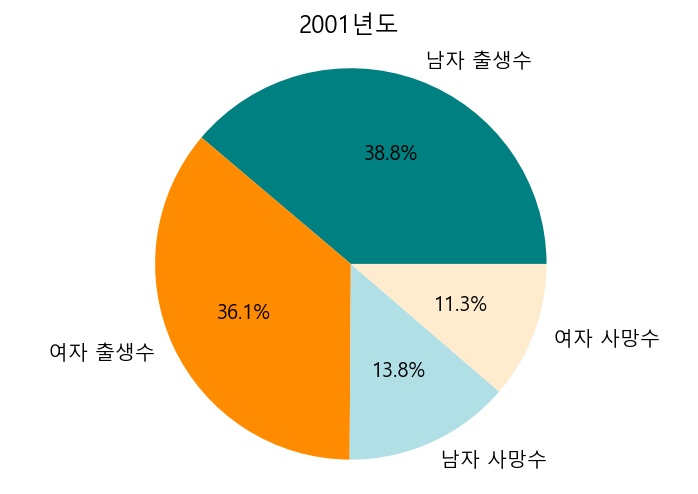

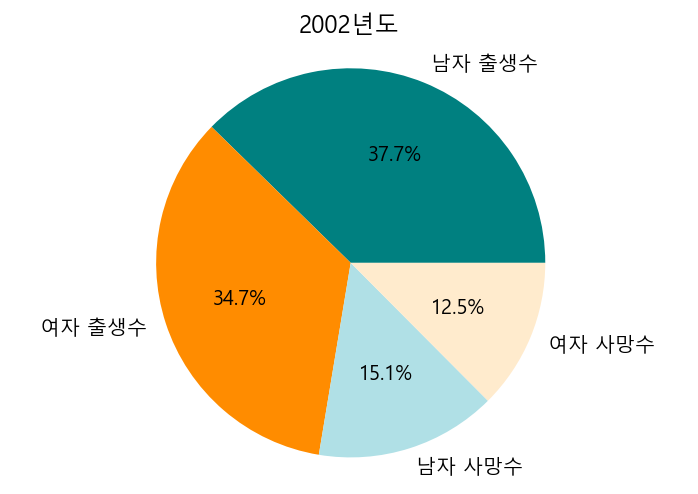

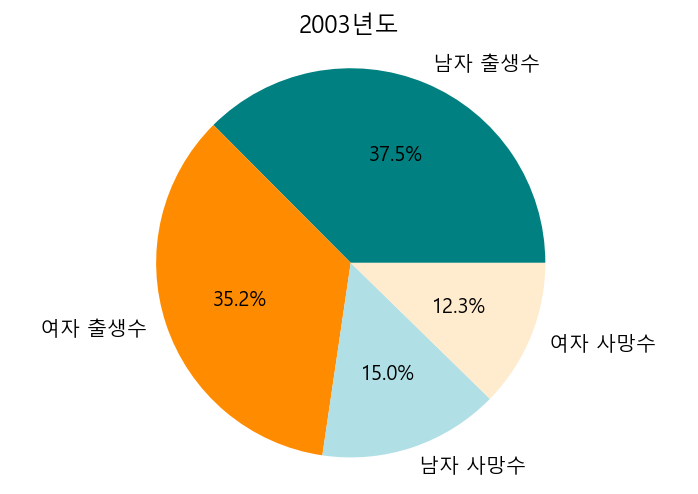

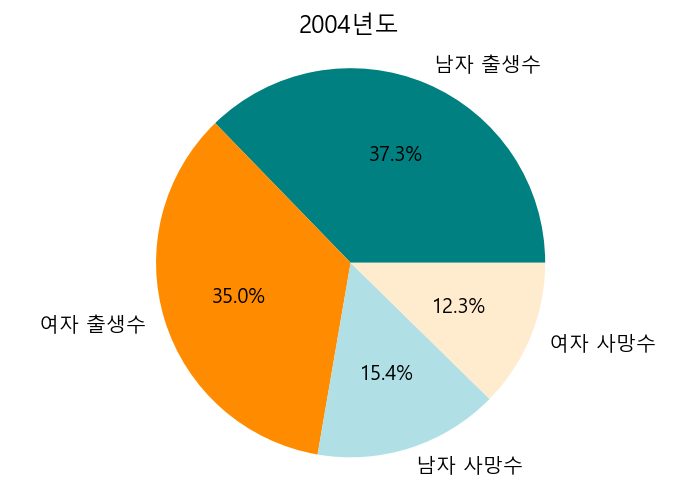

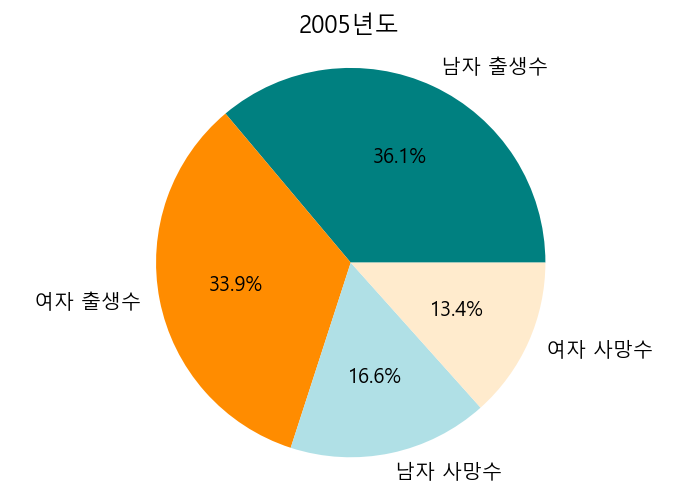

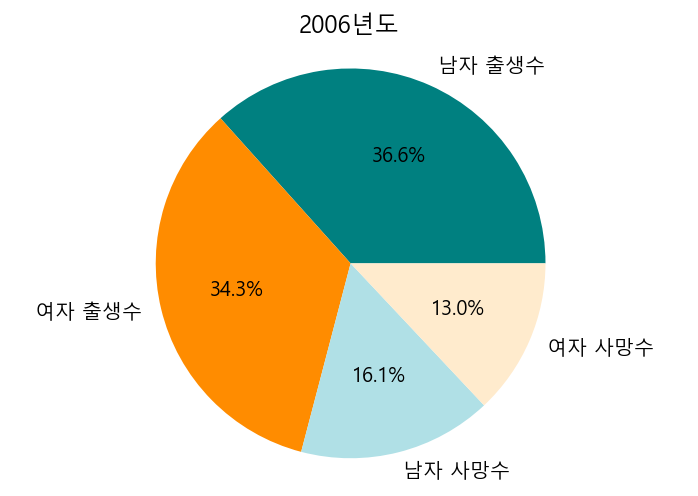

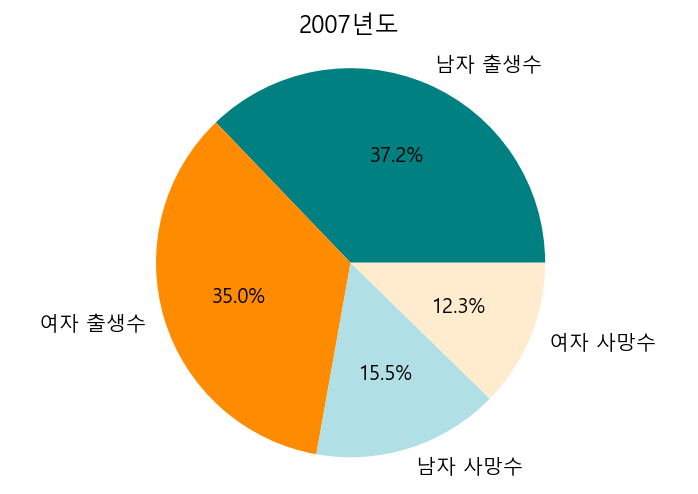

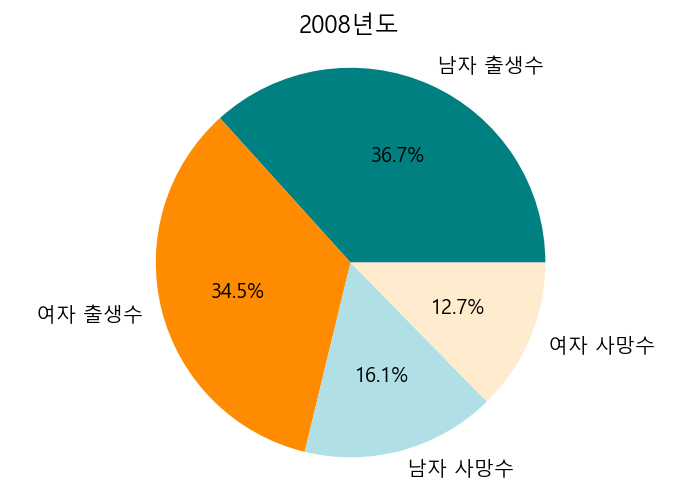

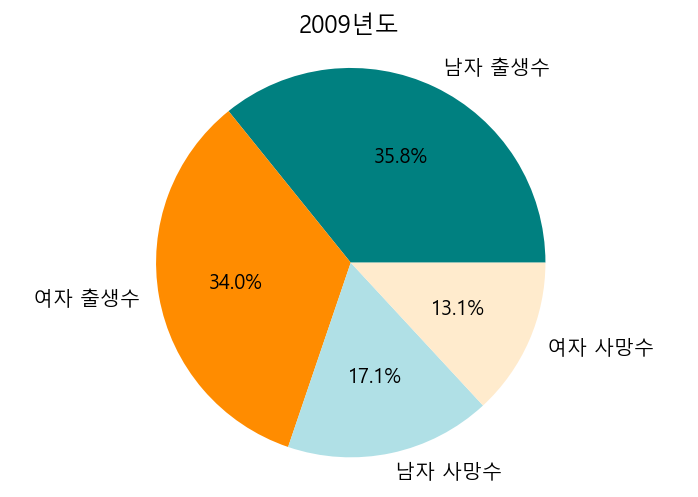

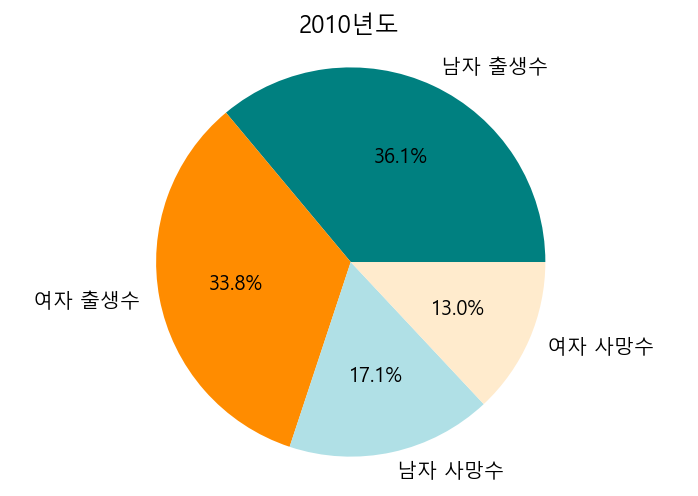

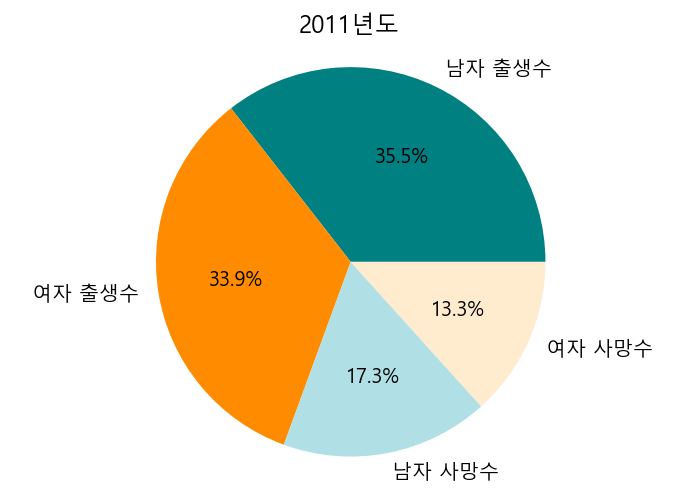

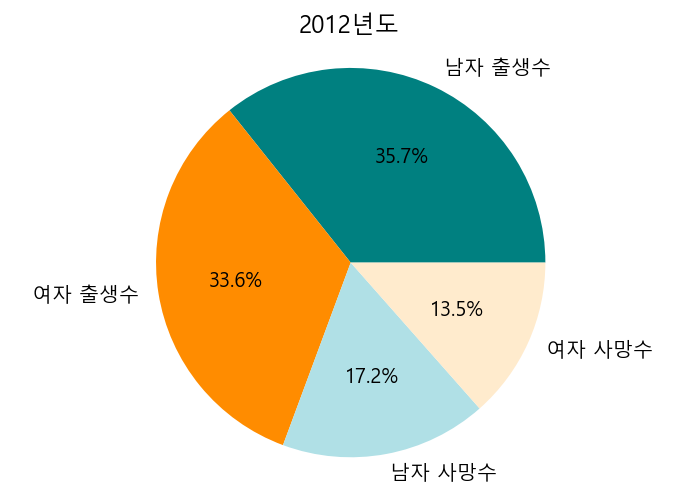

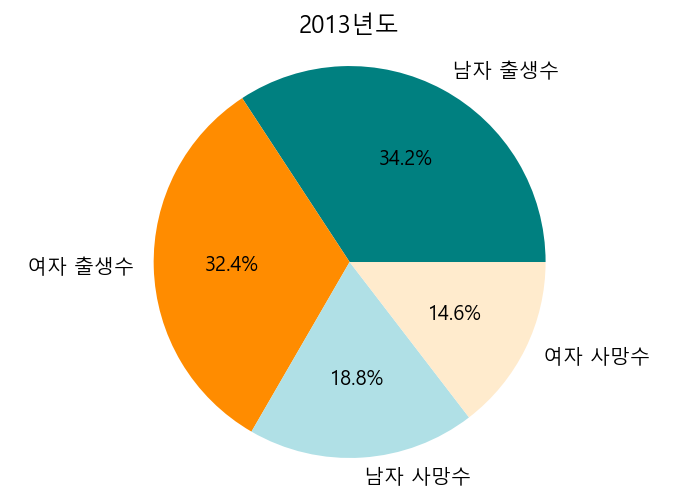

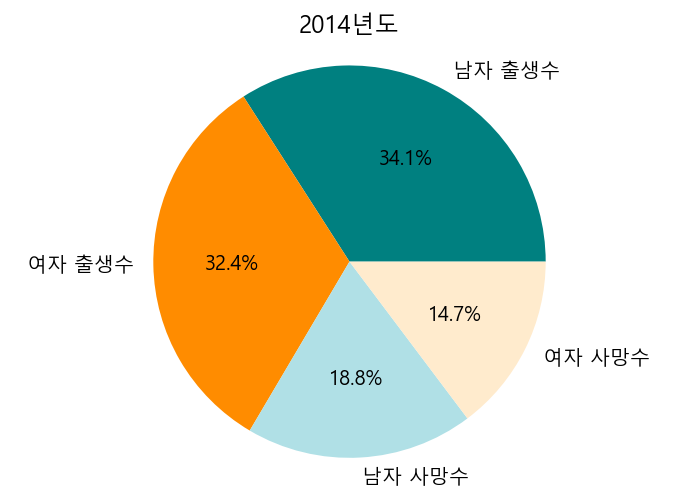

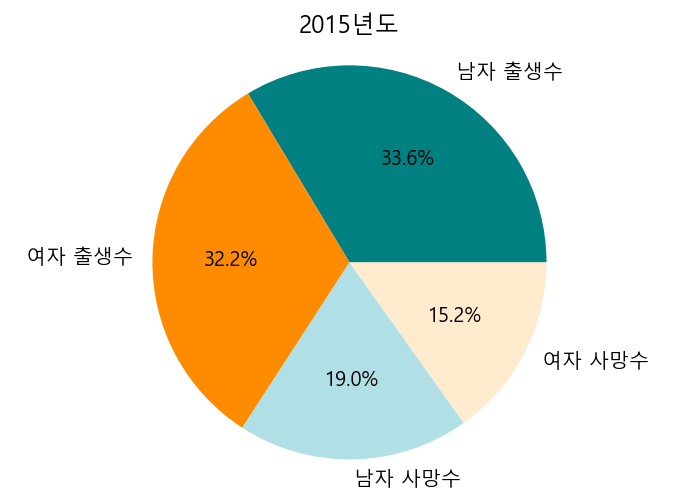

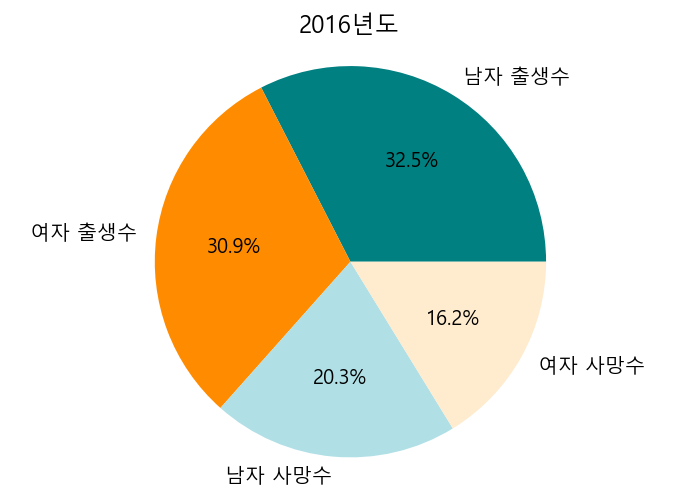

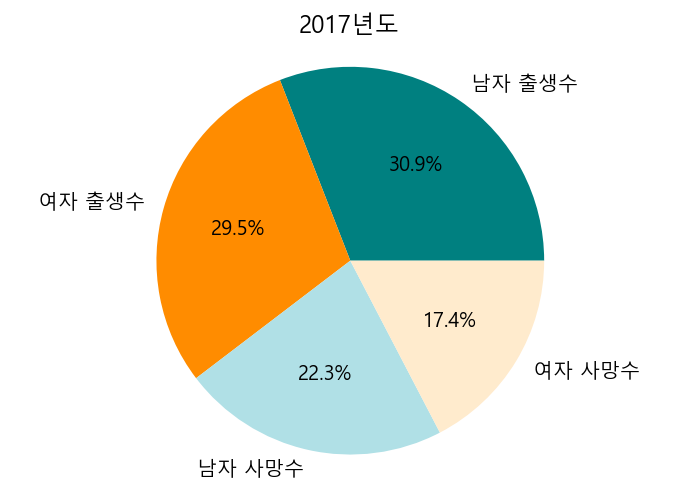

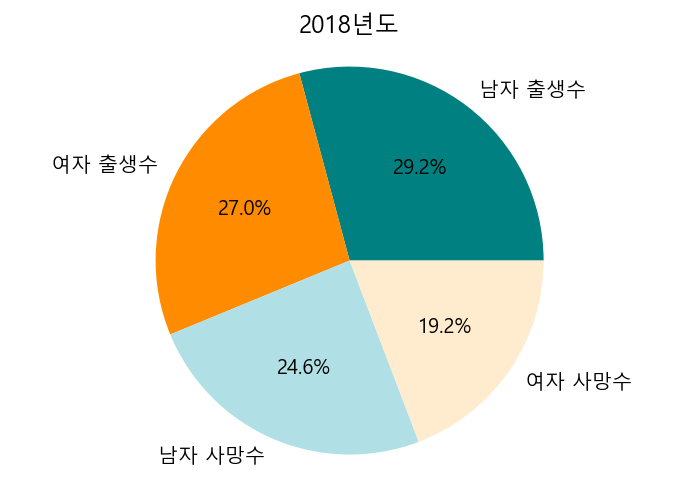

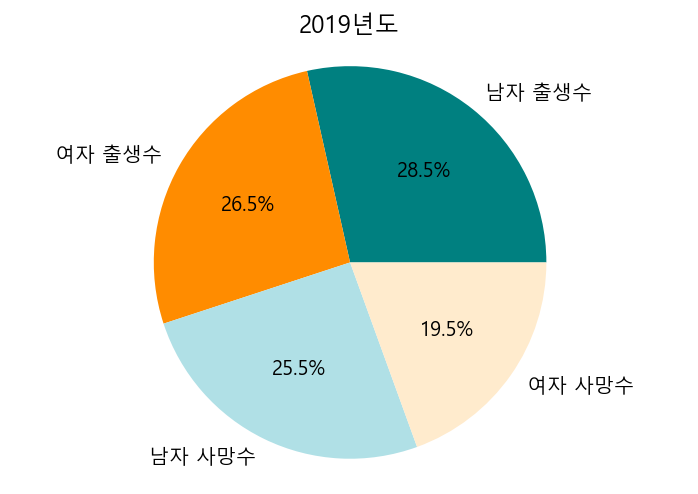

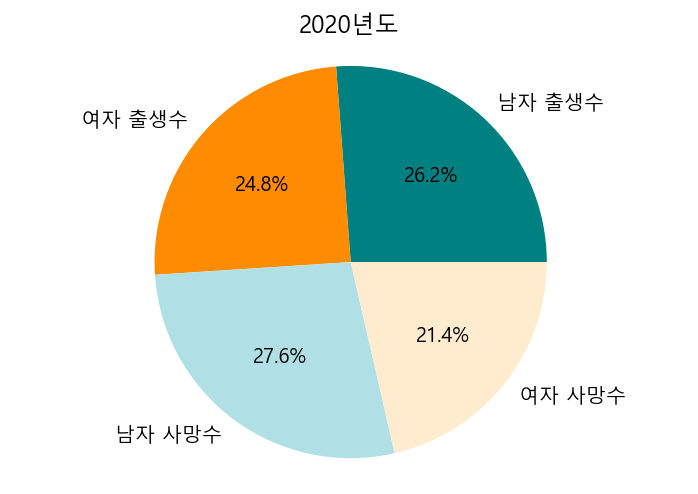

In [21]:
for i in range(len(ingu_y)):
    title = ingu_y.iloc[i,1:5].name
    label = list(ingu_y.iloc[i,1:5].index)
    size = [int(x) for x in list(ingu_y.iloc[i,1:5])]
    color = ['teal', 'darkorange', 'powderblue', 'blanchedalmond'] #6d8199', '#f15c5c', '#d6ecfa', '#f9a11b', '#c72e45'
    plt.pie(size, labels=label, colors=color, autopct='%1.1f%%')
    plt.title(str(title)+"년도")
    plt.axis('equal')
    plt.show()